In [41]:
import numpy as np
import osr_methods as osr
import line_search_methods as lsm
import numdifftools as nd
import matplotlib.pyplot as plt
from timeit import default_timer as timer

### Questão 1 Letra A

In [42]:
# def f(Xn, params):
#     return Xn[0]**2 - 3*Xn[0]*Xn[1] + 4*(Xn[1]**2) + Xn[0] - Xn[1]
    
# def grad_f(Xn, params):
#     return np.array([2*Xn[0] - 3*Xn[1] + 1, -3*Xn[0] + 8*Xn[1] - 1])
    
# def hessian_f(Xn):
#     return np.array([[2, -3],
#                     [-3, 8]], dtype=float)
    
# P0 = np.array([2, 2])
# #P0 = np.array [-1, -3]
# func = 1
params=[]
# n_func = 'Q1.a'


### Questão 1 Letra B

In [43]:
# def f(Xn, params):
#     a = 10
#     b = 1
#     return (1 + a - b*Xn[0] - b*Xn[1])**2 + (b + Xn[0] + a*Xn[1] - b*Xn[0]*Xn[1])**2 
    
# def grad_f(Xn, params):
#     a = 10
#     b = 1
#     return np.array([2*(-a*(b*(Xn[1]**2) + b - Xn[1]) + (b**2)*Xn[0]*(Xn[1]**2 + 1) - 2*b*Xn[0]*Xn[1] + Xn[0]),
#                     -2*b*(2*a*Xn[0]*Xn[1] + Xn[0]**2 + 1) + 2*a*(a*Xn[1] + Xn[0]) + 2*(b**2)*(Xn[0]**2 + 1)*Xn[1]])
# def hessian_f(Xn, params):
#     a = 10
#     b = 1
#     hessian = np.zeros((2,2))
#     hessian[0, 0] = 2*(b**2) + 2*((1 - b*Xn[1])**2)
#     hessian[0, 1] = -2*b*(a*Xn[1] + b*(-Xn[0]*Xn[1]) + b + Xn[0]) + 2*(1-b*Xn[1])*(a - b*Xn[0]) + 2*(b**2)
#     hessian[1, 0] = -2*b*(a*Xn[1] + b*(-Xn[0]*Xn[1]) + b + Xn[0]) + 2*(1-b*Xn[1])*(a-b*Xn[0]) + 2*(b**2)
#     hessian[1, 1] = 2*((a-b*Xn[0])**2) + 2*(b**2)
#     return hessian

# P0 = np.array([10, 2])
# #P0 = np.array([-2, -3])
# func = 2
params=[]
# n_func = 'Q1.b'

### Questão 2 Letra A

In [44]:
   
def f(Xn, params):
    return 450 *((np.sqrt((30 + Xn[0])**2 + Xn[1]**2) - 30 )**2) + 300 *((np.sqrt((30 - Xn[0])**2 + Xn[1]**2) - 30)**2) - 360*Xn[1]

def grad_f(Xn, params):
    return np.array([(900*(Xn[0] + 30)*(np.sqrt((Xn[0] + 30)**2 + Xn[1]**2) - 30))/np.sqrt((Xn[0] + 30)**2 + Xn[1]**2) - (600*(30 - Xn[0])*(np.sqrt((Xn[0] - 30)**2 + Xn[1]**2) - 30))/np.sqrt((Xn[0] - 30)**2 + Xn[1]**2),
                    60*(Xn[1]*(-450/np.sqrt(Xn[0]**2 + 60*Xn[0] + Xn[1]**2 + 900) - 300/np.sqrt(Xn[0]**2 - 60*Xn[0] + Xn[1]**2 + 900) + 25) - 6)])
    
def hessian_f(Xn, params):
    hessian = np.zeros((2,2))
    hessian[0, 0] = -(600*(30 - Xn[0])**2*(np.sqrt((30 - Xn[0])**2 + Xn[1]**2) - 30))/((30 - Xn[0])**2 + Xn[1]**2)**(3/2) 
    + (600*(30 - Xn[0])**2)/((30 - Xn[0])**2 + Xn[1]**2) 
    + (600*(np.sqrt((30 - Xn[0])**2 + Xn[1]**2) - 30))/np.sqrt((30 - Xn[0])**2 + Xn[1]**2) 
    + (900*(np.sqrt((Xn[0] + 30)**2 + Xn[1]**2) - 30))/np.sqrt((Xn[0] + 30)**2 + Xn[1]**2) 
    - (900*(Xn[0] + 30)**2*(np.sqrt((Xn[0] + 30)**2 + Xn[1]**2) - 30))/((Xn[0] + 30)**2 + Xn[1]**2)**(3/2) 
    + (900*(Xn[0] + 30)**2)/((Xn[0] + 30)**2 + Xn[1]**2)
    
    hessian[0, 1] = (600*(30 - Xn[0])*Xn[1]*(np.sqrt((30 - Xn[0])**2 + Xn[1]**2) - 30))/((30 - Xn[0])**2 + Xn[1]**2)**(3/2) 
    - (900*(Xn[0] + 30)*Xn[1]*(np.sqrt((Xn[0] + 30)**2 + Xn[1]**2) - 30))/((Xn[0] + 30)**2 + Xn[1]**2)**(3/2) 
    - (600*(30 - Xn[0])*Xn[1])/((30 - Xn[0])**2 + Xn[1]**2) 
    + (900*(Xn[0] + 30)*Xn[1])/((Xn[0] + 30)**2 + Xn[1]**2)
    
    hessian[1, 0] = (600*(30 - Xn[0])*Xn[1]*(np.sqrt((30 - Xn[0])**2 + Xn[1]**2) - 30))/((30 - Xn[0])**2 + Xn[1]**2)**(3/2) 
    - (900*(Xn[0] + 30)*Xn[1]*(np.sqrt((Xn[0] + 30)**2 + Xn[1]**2) - 30))/((Xn[0] + 30)**2 + Xn[1]**2)**(3/2) 
    - (600*(30 - Xn[0])*Xn[1])/((30 - Xn[0])**2 + Xn[1]**2) 
    + (900*(Xn[0] + 30)*Xn[1])/((Xn[0] + 30)**2 + Xn[1]**2)
    
    hessian[1, 1] = -(600*Xn[1]**2*(np.sqrt((30 - Xn[0])**2 + Xn[1]**2) - 30))/((30 - Xn[0])**2 + Xn[1]**2)**(3/2) 
    - (900*Xn[1]**2*(np.sqrt((Xn[0] + 30)**2 + Xn[1]**2) - 30))/((Xn[0] + 30)**2 + Xn[1]**2)**(3/2) 
    + (600*Xn[1]**2)/((30 - Xn[0])**2 + Xn[1]**2) 
    + (900*Xn[1]**2)/((Xn[0] + 30)**2 + Xn[1]**2) 
    + (600*(np.sqrt((30 - Xn[0])**2 + Xn[1]**2) - 30))/np.sqrt((30 - Xn[0])**2 + Xn[1]**2) 
    + (900*(np.sqrt((Xn[0] + 30)**2 + Xn[1]**2) - 30))/np.sqrt((Xn[0] + 30)**2 + Xn[1]**2)
    
    return hessian

P0 = np.array([0.01, -0.1])
func = 3
params=[]
n_func = 'Q2.a'

### Questão 2 Letra B

In [45]:
# def premissas(Xn):
#     dimens = Xn.size
#     #numero de nos
#     n = int(dimens/2)

#     #numero de molas
#     m = n + 1

#     #Inicializacao dos vetores com as variaveis do problema
#     Li = np.zeros(m, dtype=float) # comprimentos iniciais das molas
#     EA = np.zeros(m, dtype=float)
#     RHO = np.zeros(m, dtype=float)
#     W = np.zeros(n, dtype=float) # peso em cada no
    
#     #Atribuicao dos valores do problema
#     #Cada mola mede inicialmente 60 sobre numero de molas
#     #molas a esquerda possuem EA = 27000 e rho 8
#     #molas a direita possuem EA = 18000 e rho 16
#     Li = Li + 60/m

#     EA[ : int(m/2)] = 27000
#     EA[int(m/2) : ] = 18000
#     RHO[ : int(m/2)] = 8
#     RHO[int(m/2) : ] = 16
    
#     #Calculo dos pesos atuando em cada no
#     for j in np.arange(n):
#         W[j] = (1/2)*(RHO[j]*Li[j] + RHO[j+1]*Li[j+1])
    
#     return [n, m, Li, EA, W]

# def f(Xn, params):
#     #numero de nos
#     n = params[0]

#     #numero de molas
#     m = params[1]

#     #Inicializacao dos vetores com as variaveis do problema
#     Li = params[2] # comprimentos iniciais das molas
#     EA = params[3]
#     W = params[4] # peso em cada no
    
#     Lf = np.zeros(m, dtype=float) # comprimentos finais das molas
#     U = np.zeros(m, dtype=float) # energia elastica das molas0.01, -0.1    
#     V = np.zeros(n, dtype=float) # trabalho em cada no (desloc vert)  
      
#     #array com os deslocamentos horizontais do Xn
#     dx = Xn[0::2].copy()
#     #array com os deslocamentos verticais do Xn
#     dy = Xn[1::2].copy()
       
#     #Calculo dos comprimentos finais    
#     for k in np.arange(n):
#         if (k == 0):
#             Lf[0] = np.sqrt( (Li[0] + dx[0] )**2 + dy[0]**2 ) 
#         else:
#             a = Li[k] + dx[k] - dx[k-1]
#             b = dy[k] - dy[k-1]
#             Lf[k] = np.sqrt(a**2 + b**2)
#     Lf[m-1] = np.sqrt((Li[m-1] - dx[n-1])**2 + dy[n-1]**2)
    
#     #calculo da energia elastica em cada mola
#     U = (1/2)*(EA/Li)*((Lf - Li)**2)
    
#     #calculo do trabalho em cada no    
#     V = W*dy
    
#     #Calculo da Energia Total
#     E = np.sum(U) - np.sum(V)
    
#     return E

# def grad_f(Xn, params):
#     #numero de nos
#     n = params[0]

#     #numero de molas
#     m = params[1]

#     #Inicializacao dos vetores com as variaveis do problema
#     Li = params[2] # comprimentos iniciais das molas
#     EA = params[3]
#     W = params[4] # peso em cada no

#     Lf = np.zeros(m, dtype=float) # comprimentos finais das molas
        
#     #array com os deslocamentos horizontais do Xn
#     dx = Xn[0::2].copy()
#     #array com os deslocamentos verticais do Xn
#     dy = Xn[1::2].copy()
    
#     #Calculo dos comprimentos finais    
#     for k in np.arange(n):
#         if (k == 0):
#             Lf[0] = np.sqrt( (Li[0] + dx[0] )**2 + dy[0]**2 ) 
#         else:
#             a = Li[k] + dx[k] - dx[k-1]
#             b = dy[k] - dy[k-1]
#             Lf[k] = np.sqrt(a**2 + b**2)
#     Lf[m-1] = np.sqrt((Li[m-1] - dx[n-1])**2 + dy[n-1]**2)
    
#     grad = np.zeros(2*n, dtype=float)    
#     #iteracao em cada no
#     for k in np.arange(n):
#         if (k == 0):
#             # dLf0/dx0
#             deriv1 = (1/2)*((Li[0] + dx[0])**2 + dy[0]**2)**(-1/2)*(2*Li[0] + 2*dx[0])
#             # dLf0/dy0
#             deriv2 = (1/2)*((Li[0] + dx[0])**2 + dy[0]**2)**(-1/2)*(2*dy[0])
                        
#             if (k < n-1):
#                 #se nao for o ultimo no
#                 # dLf1/dx0
#                 deriv3 = (1/2)*((Li[1] + dx[1] - dx[0])**2 + (dy[1] - dy[0])**2)**(-1/2)*(-2*Li[1] - 2*dx[1] + 2*dx[0])
#                 # dLf1/dy0
#                 deriv4 = (1/2)*((Li[1] + dx[1] - dx[0])**2 + (dy[1] - dy[0])**2)**(-1/2)*(-2*dy[1] + 2*dy[0])
#             else:
#                 #se for o ultimo no
#                  # dLf1/dx0
#                 deriv3 = (1/2)*((Li[1] - dx[0])**2 + dy[0]**2)**(-1/2)*(-2*Li[1] + 2*dx[0])
#                 # dLf1/dy0
#                 deriv4 = (1/2)*((Li[1] - dx[0])**2 + dy[0]**2)**(-1/2)*(2*dy[0])
            
#             #dV0/dy0
#             deriv5 = W[0]
                
#             # dU0/dx0 + dU1/dx0
#             grad[0] = (1/2)*(EA[0]/Li[0])*2*(Lf[0] - Li[0])*deriv1 + (1/2)*(EA[1]/Li[1])*2*(Lf[1] - Li[1])*deriv3
            
#             #dU0/dy0 + dU1/dy0 - dV0/dy0
#             grad[1] = (1/2)*(EA[0]/Li[0])*2*(Lf[0] - Li[0])*deriv2 + (1/2)*(EA[1]/Li[1])*2*(Lf[1] - Li[1])*deriv4 - deriv5
#         else:
#             #dLfk/dxk
#             deriv1 = (1/2)*((Li[k] + dx[k] - dx[k-1])**2 + (dy[k] - dy[k-1])**2)**(-1/2)*(2*Li[k] + 2*dx[k] - 2*dx[k-1])            
#             #dLfk/dyk
#             deriv2 = (1/2)*((Li[k] + dx[k] - dx[k-1])**2 + (dy[k] - dy[k-1])**2)**(-1/2)*(2*dy[k] - 2*dy[k-1])
            
#             if (k < n-1):
#                 #se nao for o ultimo no
#                 # dLf(k+1)/dxk
#                 deriv3 = (1/2)*((Li[k+1] + dx[k+1] - dx[k])**2 + (dy[k+1] - dy[k])**2)**(-1/2)*(-2*Li[k+1] - 2*dx[k+1] + 2*dx[k])
#                 # dLf(k+1)/dyk
#                 deriv4 = (1/2)*((Li[k+1] + dx[k+1] - dx[k])**2 + (dy[k+1] - dy[k])**2)**(-1/2)*(-2*dy[k+1] + 2*dy[k])
#             else:
#                 #se for o ultimo no
#                 deriv3 = (1/2)*((Li[m-1] - dx[k])**2 + dy[k]**2)**(-1/2)*(-2*Li[m-1] + 2*dx[k])
#                 deriv4 = (1/2)*((Li[m-1] - dx[k])**2 + dy[k]**2)**(-1/2)*(2*dy[k])
            
#             #dVk/dyk
#             deriv5 = W[k]
            
#             # dUk/dxk + dU(k+1)/dxk
#             grad[2*k] = (1/2)*(EA[k]/Li[k])*2*(Lf[k] - Li[k])*deriv1 + (1/2)*(EA[k+1]/Li[k+1])*2*(Lf[k+1] - Li[k+1])*deriv3
            
#             #dUk/dyk + dU(k+1)/dyk - dVk/dyk
#             grad[2*k+1] = (1/2)*(EA[k]/Li[k])*2*(Lf[k] - Li[k])*deriv2 + (1/2)*(EA[k+1]/Li[k+1])*2*(Lf[k+1] - Li[k+1])*deriv4 - deriv5
    
#     return grad

    
# P0 = np.array([0.01,-0.1,0.01,-0.1,0.01,-0.1,0.01,-0.1,0.01,-0.1 ])
# #P0 = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
# func = 4
# params = premissas(P0)
# n_func = 'Q2.b'

### Controle Numérico

In [46]:
maxiter = 200
tol_conv = 0.001
tol_search = 0.00000001
line_step = 0.001

### Seleção do Método de OSR

In [47]:
# 1 - Univariante
# 2 - Powell
# 3 - Steepest Descent
# 4 - Newton Raphson
# 5 - Fletcher Reeves
# 6 - BFGS

metodo = 6

if (metodo == 1):
    n_met = 'Univariante'
elif (metodo == 2):
    n_met = 'Powell'
elif (metodo == 3):
    n_met = 'Steepest Descent'
elif (metodo == 4):
    n_met = 'Newton Raphson'
elif (metodo == 5):
    n_met = 'Fletcher-Reeves'
elif (metodo == 6):
    n_met = 'BFGS'

### Inicializações

In [48]:
passos = 0
dimens = P0.size
Pmin = P0.copy()
listPmin = []
listPmin.append(Pmin)
grad = grad_f(Pmin, params)
norm_grad = np.linalg.norm(grad)

if (metodo == 2):
    direcoes = np.eye(dimens, dtype=float)
    ciclos = 0
    P1 = P0.copy()
elif (metodo == 5):
    #o metodo recebe a direcao anterior 
    #inicializo a direcao com um vetor de zeros mas que nunca e usado
    #uso apenas para enviar como parametro na primeira iteracao do metodo, o qual atualiza o valor de dir para a iteracao seguinte
    dir = np.zeros((1, dimens))
    grad_last = grad.copy()
elif(metodo == 6):
    S_last = np.eye(dimens)
    grad_last = grad.copy()
    P_last = P0.copy()

### Cálculo do Ponto Mínimo

In [49]:
start = timer()
while (norm_grad > tol_conv):
    if (passos == maxiter):
        print('Nao convergiu')
        break
    passos = passos + 1
    if (metodo == 1):
        dir = osr.univariante(passos, dimens)
    elif (metodo == 2):
        dir, direcoes, P1, ciclos = osr.powell(Pmin, P1, direcoes,passos, ciclos, dimens)
    elif (metodo == 3):
        dir = osr.steepestDescent(grad)
    elif (metodo == 4):
        dir = osr.newtonRaphson(Pmin, grad, hessian_f)
    elif (metodo == 5):
        dir, grad_last = osr.fletcherReeves(dir, grad, grad_last, passos)
    elif (metodo == 6):
        dir, P_last, grad_last, S_last = osr.bfgs(Pmin, P_last, grad, grad_last, S_last, passos, dimens)
        
    intervalo = lsm.passo_cte(dir, Pmin, f, params, line_step)
    alpha = lsm.secao_aurea(intervalo, dir, Pmin, f, params, tol_search)
    Pmin = Pmin + alpha*dir
    listPmin.append(Pmin)
    grad = grad_f(Pmin, params)
    norm_grad = np.linalg.norm(grad)
    print(f'Passo{passos}, Pmin={Pmin}, d={dir}, alpha={alpha}, norm_grad={norm_grad}')

end = timer()

tempoExec = end - start
print(f'tempo= {tempoExec}')


Passo1, Pmin=[-0.3210964  7.8202397], d=[-15.04983294 360.01081649], alpha=0.02200000482243785, norm_grad=160.928436957722
Passo2, Pmin=[-0.16425603  7.89780656], d=[156.83960837  77.56648333], alpha=0.0010000048224378393, norm_grad=68.14195607294302
Passo3, Pmin=[-0.17807642  7.75031569], d=[-0.0249016  -0.26574931], alpha=0.5550000048224382, norm_grad=35.34318720892325
Passo4, Pmin=[-0.20515594  7.78848104], d=[-0.04295757  0.06054357], alpha=0.6303784061489586, norm_grad=0.12830083708682502
Passo5, Pmin=[-0.20515594  7.78848104], d=[4.65289274e-05 5.07613886e-04], alpha=-6.724538449922016e-08, norm_grad=0.12830084563740143
Passo6, Pmin=[-0.20510892  7.78899278], d=[4.70161400e-05 5.11613032e-04], alpha=1.0002339707060655, norm_grad=3.410710669974819e-05
tempo= 0.023524411000835244


### Plot

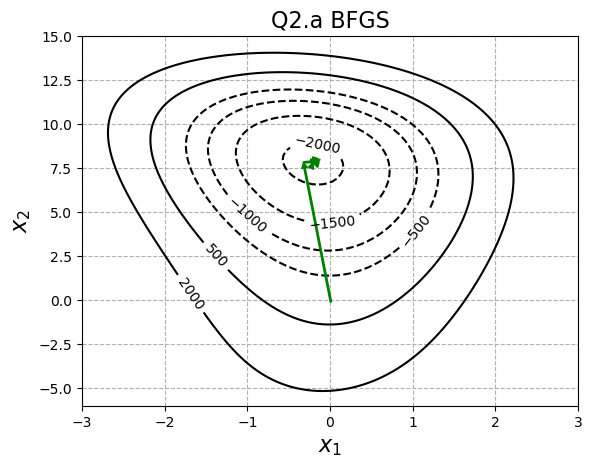

In [50]:
if (func < 4):
    if (func == 1):
        x1 = np.linspace(-2, 3, 100)
        x2 = np.linspace(-1, 2.5, 100)
        X1, X2 = np.meshgrid(x1, x2)
        X3 = f([X1, X2])
        niveis = plt.contour(X1, X2, X3, [-0.2, 0, 1, 3, 6, 10, 25], colors='black')
    elif (func == 2):
        x1 = np.linspace(-5, 25, 100)
        x2 = np.linspace(-10, 10, 100)
        X1, X2 = np.meshgrid(x1, x2)
        X3 = f([X1, X2])
        niveis = plt.contour(X1, X2, X3,[50, 100,200,500, 1000, 2000, 5000], colors='black')
    elif (func == 3):
        x1 = np.linspace(-3, 3, 100)
        x2 = np.linspace(-6, 15, 100)
        X1, X2 = np.meshgrid(x1, x2)
        X3 = f([X1, X2], params)
        niveis = plt.contour(X1, X2, X3,[-2000,-1500, -1000, -500,500,2000], colors='black')
        
    plt.clabel(niveis, inline=1, fontsize=10)

    for i in np.arange(len(listPmin)-1):
        plt.annotate('', xy=listPmin[i+1], xytext=listPmin[i],
                    arrowprops=dict(width=1, color='green', headwidth=4, headlength=4, shrink=0.0), fontsize='10')
    #    #plt.plot(pontos[i][0], pontos[i][1], marker="o", markersize=7, markeredgecolor="green", markerfacecolor="green")
    #    #plt.plot(pontos[i+1][0], pontos[i+1][1], marker="o", markersize=1, markeredgecolor="green", markerfacecolor="green")
    plt.xlabel('$x_1$', fontsize='16')
    plt.ylabel('$x_2$', fontsize='16')
    plt.grid(linestyle='--')
    titulo = n_func + ' ' + n_met
    plt.title(titulo, fontsize='16')
    file_name = n_func + '_' + n_met + '_P0=' + np.array2string(P0, precision = 2, separator=' ') + '.pdf'
    plt.savefig(file_name, format="pdf")
    plt.show()